In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
game_data = pd.read_csv("./logs/log_two_player.csv", header=None, na_values="None")
# add header to the game data
game_data.columns =["step1", "step2", "step3", "step4", "step5", "step6", "step7", "step8", "step9", "winner", "pattern", "total_step"]
game_data

,step1,step2,step3,step4,step5,step6,step7,step8,step9,winner,pattern,total_step
0,5,2,1,9,7,3,4,0,0,X,V,7
1,5,1,7,3,2,8,6,4,9,0,0,9
2,5,2,7,3,1,4,9,0,0,X,D,7
3,4,5,3,9,1,2,7,0,0,X,V,7
4,5,1,2,8,7,3,6,4,9,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,5,3,2,8,6,4,7,9,0,0,9
60,3,4,5,7,1,9,2,0,0,X,H,7
61,5,3,1,9,6,4,2,8,7,0,0,9
62,3,5,1,2,8,4,6,9,7,0,0,9


In [3]:
game_data.insert(0, "player1", "X")
game_data.insert(1, "player2", "O")

# simplify the position in 3 categories： middel, corner, center
MIDDLE = {2, 4, 6, 8}
CORNER = {1, 3, 7, 9}
CENTER = 5
category_list = []
for index, row in game_data.iterrows():
    if row.iloc[2] == 5:
        category_list.append("CEN")
    elif row.iloc[2] in MIDDLE:
        category_list.append("MID")
    elif row.iloc[2] in CORNER:
        category_list.append("COR")
game_data["step1_category"] = category_list

# in winner column, 1 stands for X win, -1 stands for O win, 0 stands for a draw game
# in step1_category column, 1 stands for center position, 2 stands for corner position, 3 stands for middle position
game_data = game_data.replace("CEN", 1).replace("COR", 2).replace("MID", 3).replace("X", 1).replace("O", -1)
game_data

,player1,player2,step1,step2,step3,step4,step5,step6,step7,step8,step9,winner,pattern,total_step,step1_category
0,1,-1,5,2,1,9,7,3,4,0,0,1,V,7,1
1,1,-1,5,1,7,3,2,8,6,4,9,0,0,9,1
2,1,-1,5,2,7,3,1,4,9,0,0,1,D,7,1
3,1,-1,4,5,3,9,1,2,7,0,0,1,V,7,3
4,1,-1,5,1,2,8,7,3,6,4,9,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,-1,1,5,3,2,8,6,4,7,9,0,0,9,2
60,1,-1,3,4,5,7,1,9,2,0,0,1,H,7,2
61,1,-1,5,3,1,9,6,4,2,8,7,0,0,9,1
62,1,-1,3,5,1,2,8,4,6,9,7,0,0,9,2


In [4]:
X = game_data[["step1_category"]]
y = game_data[["winner"]]

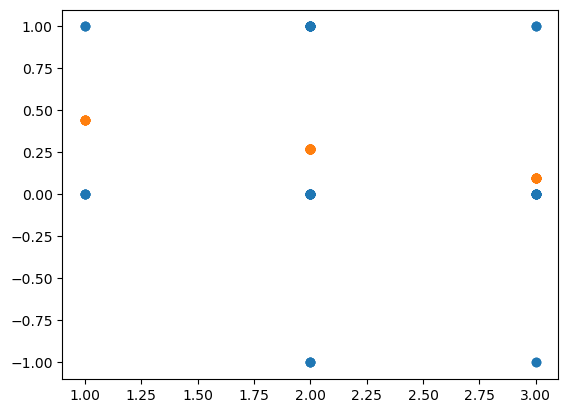

In [5]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
# print(y_pred)
plt.scatter(X, y)
plt.scatter(X, y_pred)

In [6]:
res = np.unique(np.concatenate((X, y_pred), axis=1), axis=0)
print(res)
tag = ["Center", "Corner", "Middle"]
for i in range(0, len(tag)):
    print(f"If the first player put on {tag[i]}, the winning rate is {round((res[i][1] + 1) / 2 * 100, 2)}%")

[[1.         0.44565217]
 [2.         0.27173913]
 [3.         0.09782609]]
If the first player put on Center, the winning rate is 72.28%
If the first player put on Corner, the winning rate is 63.59%
If the first player put on Middle, the winning rate is 54.89%


In [7]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# the coefficients give us the model parameters

print("Coefficients:")
for feature, coefficient in zip(X.columns, model.coef_):
    print(f"{feature}: {coefficient}")

# Print out the intercept
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 0.3641304347826087
R-squared: 0.02898550724637683
Coefficients:
step1_category: [-0.17391304]
Intercept: [0.61956522]


Report：
1. The linear regression model shows that if the first player X puts the first step in the center position (the 5 position and present as "1" in x-axis), the result for X is either win (shows as 1.00 in y-axis) or draw game (shows as 0.00 in y-axis). And when X puts the first step in corner or middle position, it's winning rates are lower, but still larger than 50%.
2. According to the model, if the first player, which in this game is always "X", puts the first step at the center position (present as "1" in x-axis) it will have the highest winning rate at 72.28%. Thus center position is best to start the game.
3. Also, for the first player's first step, the corner position (present as "2" in x-axis) has a winning rate of 63.59%. And middle position (present as "3" in x-axis) has the lowest winning rate of 54.89%
